In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from  pandas_datareader import DataReader

from datetime import datetime

from __future__ import division

In [11]:
# My Data
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock, 'yahoo', start, end)


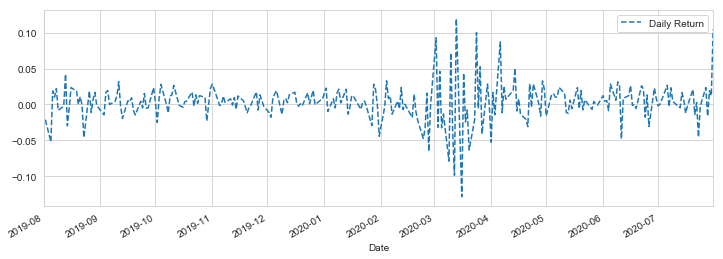

In [12]:
# Show percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--')


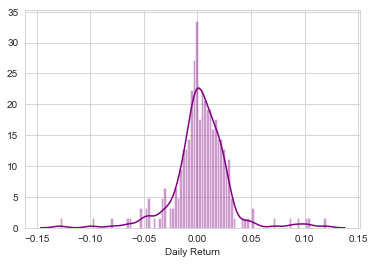

In [13]:
# Histogram of the average daily return
# ... with seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

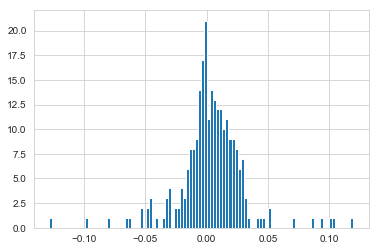

In [14]:
# ... with pandas build in histogram
AAPL['Daily Return'].hist(bins=100)

In [15]:
# How to analyze the returns of all the stocks in our list: Build a DataFrame with all the ['Close'] columns for each of the stocks dataframes

closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-08-01,205.971817,1855.319946,1209.010010,136.381760
2019-08-02,201.613846,1823.239990,1193.989990,135.235855
2019-08-05,191.059784,1765.130005,1152.319946,130.602890
2019-08-06,194.676620,1787.829956,1169.949951,133.052750
2019-08-07,196.692566,1793.400024,1173.989990,133.635544


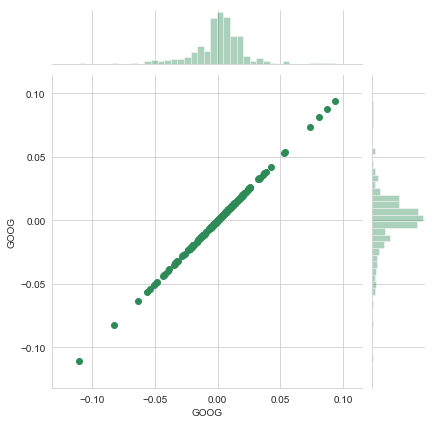

In [16]:
tech_rets = closing_df.pct_change()

# compaire google to itself:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

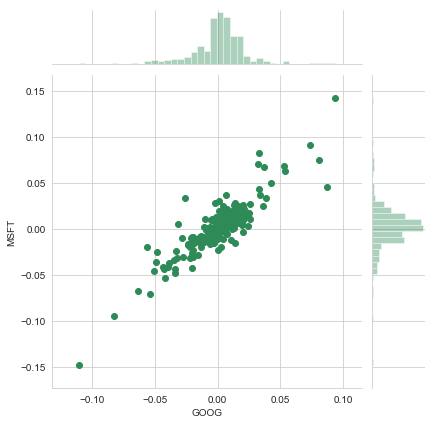

In [17]:
# Now: compare the daily returns of Google and Microsoft

sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter', color='seagreen')

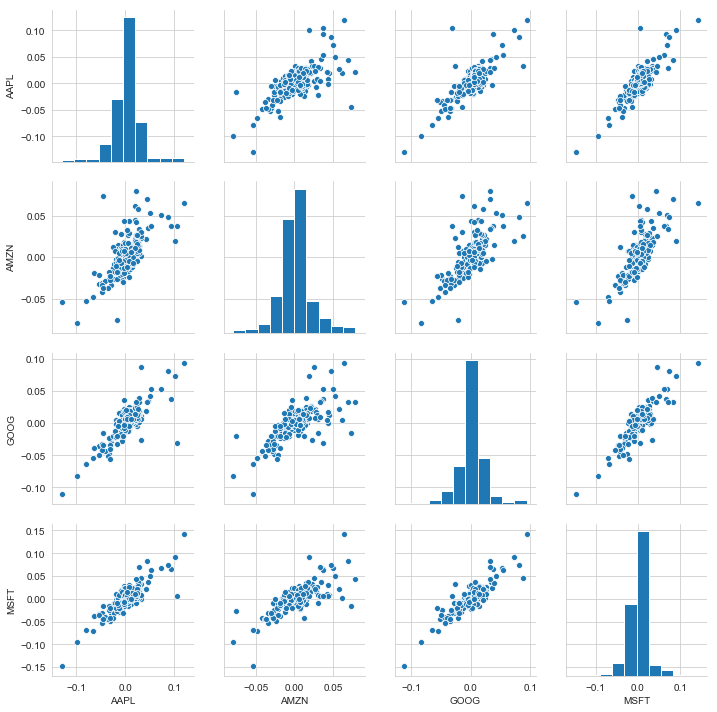

In [18]:
# Use pairplot on a DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

In [19]:
# Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

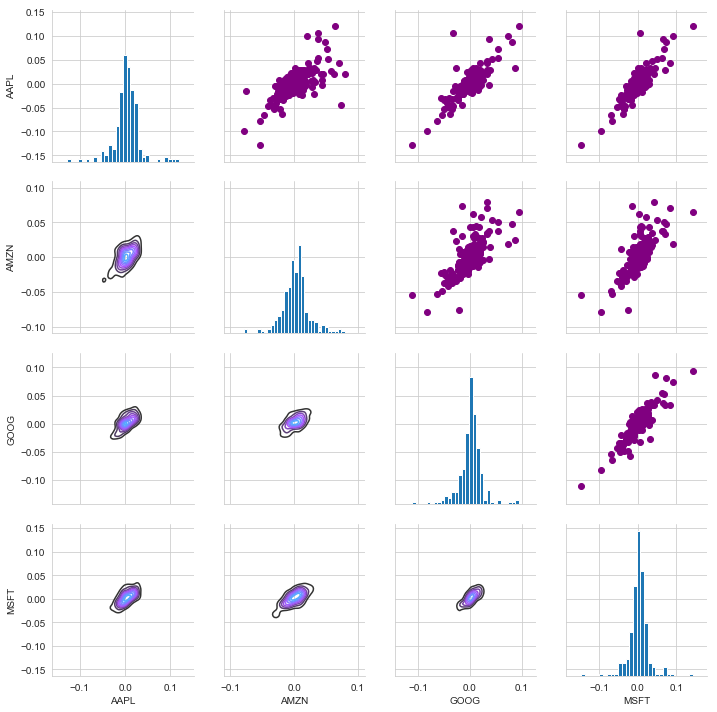

In [20]:
# Set up a figure and call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Using map_upper to specify what the lower triangle will look like.
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

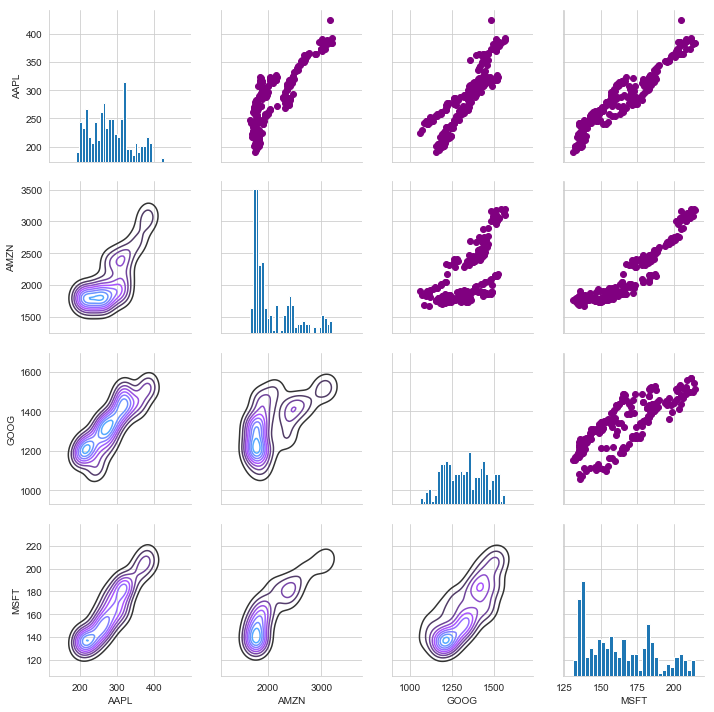

In [22]:
# Same with closing prices:
# c&p the code above and change tech_rets to closing_df (keep everything else the same)

returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

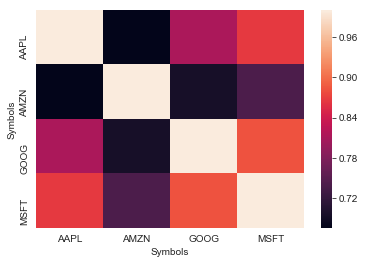

In [27]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.dropna().corr(),annot=False)